# Image Compression by K-means clustering

In this exercise, you have to perform an image compression of the given picture of New York (New York.jpeg).

To do so, we want to keep not all the possible colors, but only 4.

Thus, you have to perform a clustering algorithm, with K=4, and show the image with those only 4 colors.

```
🔦 Hint:: An image is composed of pixels. Each pixel is made of 3 channels: Red, Green, Blue (RGB). Those color levels are encoded on 8 bits, meaning they are in the range [0-255]. For example, a pixel with this RGB color : (0, 0, 255) will be a very strong blue pixel.

```

In [62]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

digits = datasets.load_digits()

In [63]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

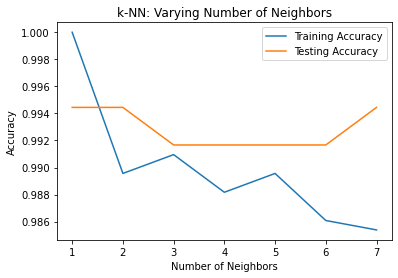

In [64]:
train_data = []
test_data = []
test_range = range(1, 8)

for k in test_range:
    kNN = KNeighborsClassifier(n_neighbors = k)
    kNN.fit(X_train, y_train)
    train_data.append(kNN.score(X_train, y_train))
    test_data.append(kNN.score(X_test, y_test))
    
plt.plot(test_range, train_data, label = "Training Accuracy")
plt.plot(test_range, test_data, label = "Testing Accuracy")
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('k-NN: Varying Number of Neighbors')
plt.legend()
plt.show()

In [65]:
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
linear_report = classification_report(y_test, y_pred)

svm = SVC(kernel = 'sigmoid')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
sigmoid_report = classification_report(y_test, y_pred)

svm = SVC(kernel = 'rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
rbf_report = classification_report(y_test, y_pred)

print(linear_report)
print(sigmoid_report)
print(rbf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      1.00      0.99        36
           2       0.97      1.00      0.98        32
           3       1.00      0.94      0.97        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        34
           7       0.95      1.00      0.98        40
           8       1.00      0.92      0.96        38
           9       0.95      0.97      0.96        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.81      0.81      0.81        36
           2       1.00      1.00      1.00        32
           3       1.00 

<AxesSubplot:>

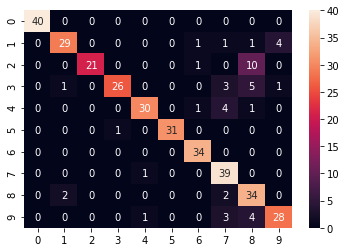

In [66]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)
con_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(con_matrix, annot=True)

Text(0, 0.5, 'Accuracy')

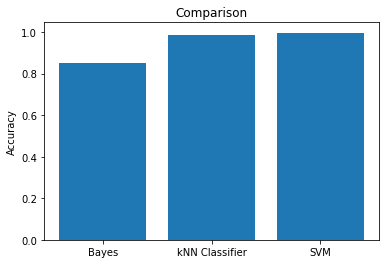

In [67]:
plt.bar(["Bayes", "kNN Classifier", "SVM"], [bayes.score(X_train, y_train), kNN.score(X_train, y_train), svm.score(X_train, y_train)])
plt.title("Comparison")
plt.ylabel("Accuracy")

<ipython-input-68-81ddd878fb65>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  regression.fit(x[:, None], y)
<ipython-input-68-81ddd878fb65>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(regression.score(x[:, None], y))
<ipython-input-68-81ddd878fb65>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  fig, ax = plt.plot(x, y, 'bo', x, regression.predict(x[:, None]), '-k')


0.6192442167740035


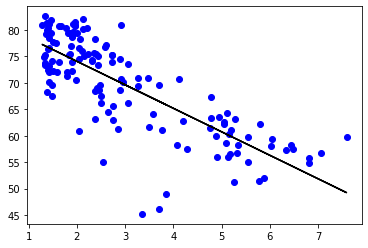

In [68]:
df = pd.read_csv("gapminder.csv")

x = df["fertility"]
y = df["life"]

regression = LinearRegression()
regression.fit(x[:, None], y)
print(regression.score(x[:, None], y))

fig, ax = plt.plot(x, y, 'bo', x, regression.predict(x[:, None]), '-k')

<AxesSubplot:>

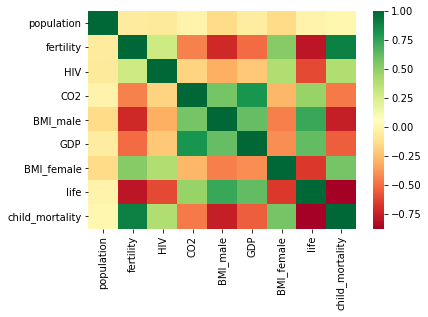

In [69]:
df = df.dropna()
df = df.drop(columns = "Region")
data = df.corr()
sns.heatmap(data = data, annot = False, yticklabels=df.columns, cmap = "RdYlGn")

In [70]:
cross_val_score(regression, x[:, None], y, cv=5)

<ipython-input-70-911c93199250>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cross_val_score(regression, x[:, None], y, cv=5)


array([0.71001079, 0.75007717, 0.55271526, 0.547501  , 0.52410561])

In [71]:
df = pd.read_csv("creditcard.csv")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


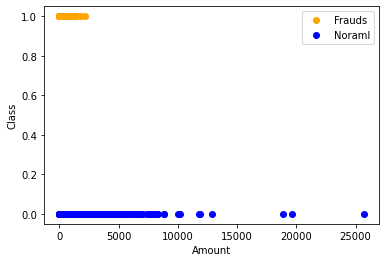

In [72]:
frauds = df.loc[df["Class"] == 1]
non_frauds = df.loc[df["Class"] == 0]
plt.plot(frauds.Amount, frauds.Class, 'o', color= "orange", label= "Frauds")
plt.plot(non_frauds.Amount, non_frauds.Class, 'o', color= "blue", label= "Noraml")
plt.xlabel("Amount")
plt.ylabel("Class")
plt.legend()

C:\Users\Luke Kelly\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

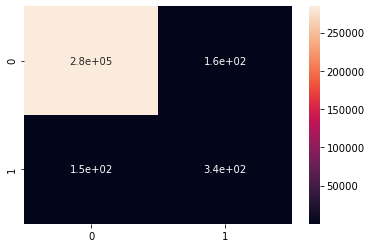

In [73]:
X = df.drop("Class", axis = 1)
y = df.Class

log_regression = LogisticRegression()
log_regression.fit(X, y)
y_pred = log_regression.predict(X)
conf_matrix = confusion_matrix(y, y_pred)

sns.heatmap(conf_matrix, annot=True)